# Chapter 2 Force Vectors

## Section 2.1 Scalars and Vectors
* Scalar - any positive or negative physical quantity that can be completely specifeid by its magnitude.
* Vector - any physical quantity that requires both a magnitude and direction.


## Section 2.2 Vector Operations
* Multiplication and Division of a Vector by a Scalar - when a vector is multiplied or divided by a positive scalar its magnitude increases or decreases by that amount, if it is multiplied or divided by a negative scalar it will also change directions.
* Vector Addition - $\vec R = \vec A + \vec B$ , $\vec R$ is the resultant vector, $\vec A$ and $\vec B$ are the component vectors
* Vector Subtraction - $\vec R = \vec A - \vec B =  \vec A + (-\vec B)$

## Section 2.3 Vector Addition of Forces
* Resultant Force - addition of two component forces, $\vec F_R = \vec F_1 + \vec F_2$
* Finding the Components of a Force - $\vec F = \vec F_u + \vec F_v$ u and v are axes
* Addition of Multiple Forces - $\vec F_R = \vec F_1 + \vec F_2 + \vec F_3 = (\vec F_1 + \vec F_2) + \vec F_3$



Problem 20 - Determine the design angle f (0 … f … 90)
between struts AB and AC so that the 400-lb horizontal
force has a component of 600 lb which acts up to the left, in
the same direction as from B towards A. Take u = 30.

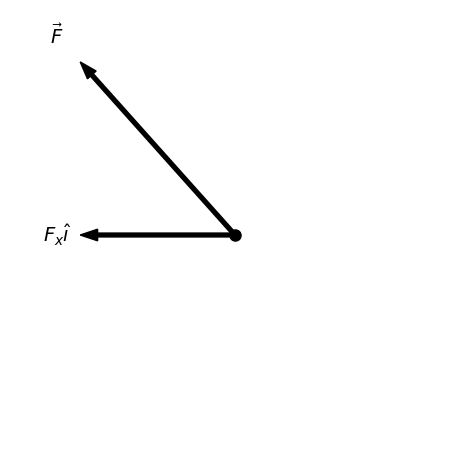

In [35]:
import numpy as np
from matplotlib.patches import FancyArrow
import matplotlib.pyplot as plt

plt.rcParams["figure.autolayout"] = True

def plot_vector(tail, components, vector_color='black', vector_width=0):
    """
    :param tail: array of x, y coordinates of vector tail
    :param components: array of x, y coordinates of vector components
    :param vector_color: string of vector color
    :param vector_width: float of vector width
    :return: (nothing)
    """
    if vector_width == 0:
        actual_vector_width = 0.02*np.max(components)
    else:
        actual_vector_width = vector_width
    vector_arrow = FancyArrow(tail[0], tail[1], components[0], components[1],
                              width=actual_vector_width, length_includes_head=True, color=vector_color)
    axes.add_patch(vector_arrow)
    return


def label_vectors(tail, components, label, space_factor=0.15, text_color='black'):
    text_position = tail + (1. + space_factor) * components
    axes.text(text_position[0], text_position[1], label, ha='center', va='center', color=text_color, fontsize=14)
    return


def mark_origin(position=[0, 0], marker_color='black', marker_size=8):
    plt.plot(position[0], position[1], 'o', markersize=marker_size, color=marker_color)
    return

# Problem givens
theta = np.radians(30)
force = 600
force_x = 400

# Solution for unknown hinge angle
phi = -theta + np.arccos(force_x/force)

# Create plot area
figures, axes = plt.subplots()

# Both vectors tail at origin
vector_tail = np.array([0, 0])
# Angle of up-left force with horizontal
vector_horizontal_angle = np.pi - (phi + theta)
# Define both force vectors by component
vectors = np.array([
    [-force_x, 0], # horizontal force
    force*np.array([np.cos(vector_horizontal_angle), np.sin(vector_horizontal_angle)])
])
vector_labels = [r'$F_x \hat{\imath}$', r'$\vec{F}$']

for vector_label, vector in zip(vector_labels, vectors):
    plot_vector(vector_tail, vector, vector_width=0.01*1000)
    label_vectors(vector_tail, vector, vector_label)

mark_origin()

# Set axis limits
maximum_component = np.max(vectors)
# minimum_component = np.min(vectors)
# axes_limits = 10**np.ceil(np.log10(maximum_component))
axes_limits = 1.3 * maximum_component
axes.set_xlim([-axes_limits, axes_limits])
axes.set_ylim([-axes_limits, axes_limits])

# Turn off axes and axis ticks
axes.set_xticks([])
axes.set_yticks([])
axes.axis('off')

# Make the axes of equal proportion (1 x = 1 y)
axes.set_aspect('equal')

# Show the plot
plt.show()


In [15]:
import numpy as np
theta = np.radians(30)
force = 600
force_x = 400
phi = -theta + np.arccos(force_x/force)
print(f' \u03C6 =  {np.degrees(phi):.1f}\u00B0')

 φ =  18.2°


## Section 2.4 Addition of a System of Coplanar Forces
* Rectangular Components of a force - $\vec F = \vec F_x + \vec F_y$, $F_x =  F cos(\theta) $, $ F_y =  F sin(\theta)$
* Cartesian Vector Notation - $\vec F = F_x \vec i + F_y \vec j$

Problem 41
Determine the magnitude of the resultant force
and its direction, measured counterclockwise from the
positive x axis.

## Section 2.5 Cartesian Vectors
* Right-Handed Coordinate System - thumb points in positive z direction, fingers curled about z axis and directed from the positive x-axis to the y-axis
* Cartesian Vector Form -$\vec A = A_x \vec i + A_y \vec j + A_z \vec k$
* Magnitude of Cartesian Vector - Magnitude of $\vec A$ = A = $\sqrt{A_x^2 + A_y^2 + A_z^2} $
* Coordinate Direction Angles - $\alpha, \beta, \gamma$; $cos\alpha = {A_x \over A}$, $cos\beta = {A_y \over A}$, $cos\gamma = {A_z \over A}$
* $\vec u_A = cos \alpha \vec i + cos \beta \vec j + cos \gamma \vec k$
* $ cos^2 \alpha \vec i + cos^2 \beta \vec j + cos^2 \gamma \vec k = 1$
* Transverse and Azmuth Angles - $\theta$ and $\phi$ respectively, $A_x = A sin \phi cos \theta$, $A_y = A sin \phi sin \theta$ $A_z = A cos \phi$
* $\vec A = A sin \phi cos\theta \vec i + A sin \phi sin \theta \vec j + A cos \phi \vec k$

## Section 2.6 Addition of Cartesian Vectors
* $\vec R = \vec A + \vec B = (A_x + B_x) \vec i + (A_y + B_y) \vec j + (A_z + B_z) \vec k$
* $\vec F_R = \sum \vec F = \sum F_x \vec i + \sum F_y \vec j + \sum F_z \vec k$

Problem 78
The two forces F1 and F2 acting at A have a resultant
force of FR = 5-100k6 lb. Determine the magnitude and
coordinate direction angles of F2.

## Section 2.7 Position Vectors
* Position Vector - A fixed vector which locates a point in space relative to another point, denoted $\vec{r}$, $\vec r = x \hat{\imath} + y \hat{\jmath} + z \hat {k}$

## Section 2.8 Vector Directed Along a Line
* Unit Vector $(\vec u)$ - $\vec F = F \vec u = F \frac{\vec r}{r}  = F$$  (x_B - x_A) \vec i + (y_B - y_A) \vec j + (z_B - z_A) \vec k \over \sqrt{(x_B-x_A)^2 + (y_B - y_A)^2 + (z_B - z_A)^2}$
* $\vec F$ has units of force, $\vec r$ has units of length
* A force $\vec F$ acting in the direction of a position vector $\vec r$ can be represented in Cartesian form if the unit vector $\vec u$ if the position vector is determined, and it is multiplied by the magnitude of the force , $\vec F = F \vec u = F {\vec r \over r}$

Problem 95
The plate is suspended using the three cables which
exert the forces shown. Express each force as a Cartesian
vector.

## Section 2.9 Dot Product
* Dot Product -  $ \vec A \cdot \vec B = A B cos{\theta}$
* Laws of Operation
    * Commutative law - $ \vec A \cdot \vec B =  \vec B \cdot \vec A$
    * Multiplication by Scalar - $ a ( \vec A \cdot \vec B) =  (a\vec A) \cdot \vec B =  \vec A \cdot (a\vec B) $
    * Distributive Law - $ \vec A \cdot (\vec B + \vec C) =  \vec A \cdot \vec B +  \vec A \cdot \vec C$
* Cartesian Vectors - $ \vec A \cdot \vec B = A_x B_x + A_y B_y + A_z + B_z$
* Applications of Dot Product
    * Used to determine the angle formed between two vectors or intersecting lines
        * $\theta = cos^{-1}$ $(\vec A \cdot \vec B)\over(AB)$
    * The components of a vector parallel and perpendicular to a line, component vector $\vec A$ parallel or collinear with the line aa is defined by $A_a$, $A_a = A cos \theta$, referred to as projection of $\vec$ onto the line, a right angle is formed in the construction, if the direction of the line is denoted by $\vec u_a$, then $A_a = A cos \theta = \vec A \cdot \vec u_a$, $\vec A_a = A_a \vec u_a$


Problem 114
Determine the angle u between the two cables.
<img src="problem_2_114.png"/>